In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#importing the dataset

df = pd.read_csv('height-weight.csv')

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


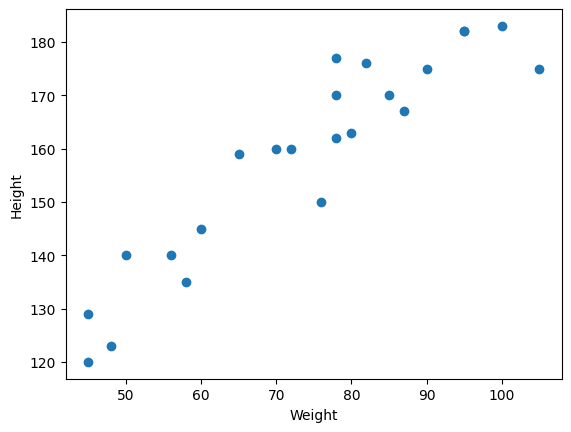

In [9]:
#plotting the graph

plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height');

In [10]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


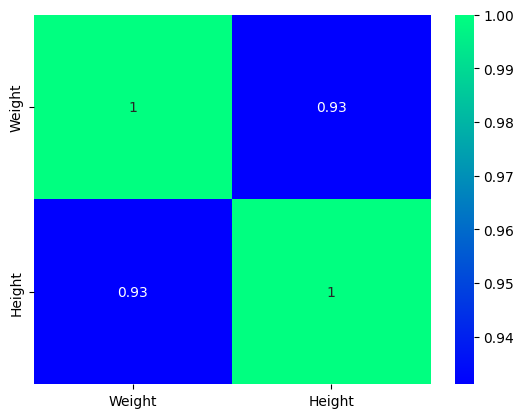

In [13]:
sns.heatmap(df.corr() , annot=True,cmap='winter');

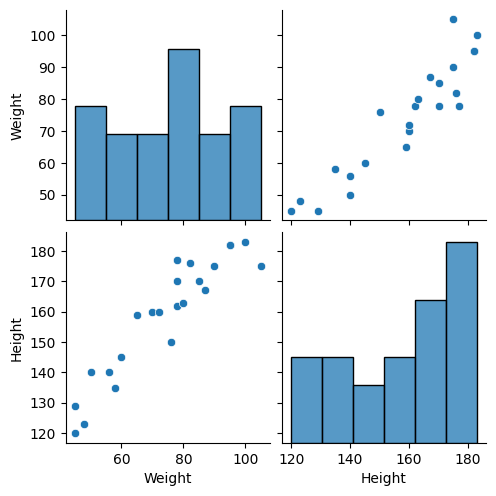

In [14]:
#pltting the graph
sns.pairplot(df);

In [18]:
#splitting the data

X = df[['Weight']] #- Input features should be in Dataframe while output can be a series form
y = df['Height']

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape , y_train.shape

((18, 1), (18,))

In [22]:
#standardization

#z-score : (x-mean)/std

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)

#we only fit_transform training set and on predict set X_test will just transform it uses x_train's mean and std

array([[-0.61743347],
       [ 1.8221817 ],
       [-1.43063853],
       [ 0.73790829],
       [-0.83428815],
       [ 0.84633563],
       [ 0.3584126 ],
       [-0.72586081],
       [ 0.46683994],
       [-0.34636512],
       [ 1.280045  ],
       [-1.15957018],
       [ 0.3584126 ],
       [-1.43063853],
       [ 0.03313058],
       [-1.26799752],
       [ 0.3584126 ],
       [ 1.55111335]])

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #-scaling is required for everty algo except DT,RF

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1).fit(X_train,y_train)

In [26]:
print("Coefficient : ", lr.coef_)
print("Intercept : " ,lr.intercept_)

Coefficient :  [18.46611321]
Intercept :  155.55555555555554


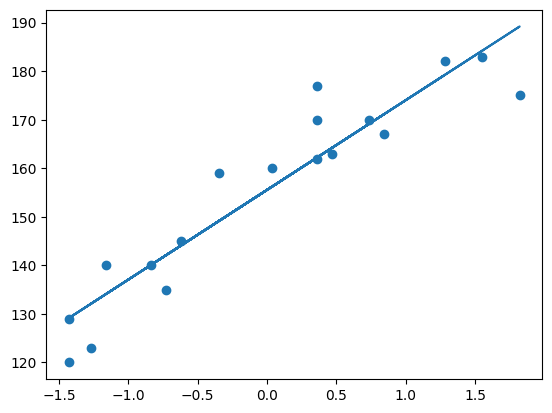

In [27]:
#plotting graph of best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [36]:
y_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE :",rmse)

MSE :  48.50256021809284
MAE :  5.889548881047199
RMSE : 6.9643779491131035


In [38]:
from sklearn.metrics import r2_score

print("R2-Score" , r2_score(y_test,y_pred))

R2-Score 0.6511611031495049


In [40]:
#adjusted r2-score
#Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]


(1-r2_score(y_test,y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.46511852913399343

In [42]:
import statsmodels.api as sm 

In [43]:
model = sm.OLS(y_train,X_train).fit()

In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):             -0.044
Method:                 Least Squares   F-statistic:                             0.2391
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                       0.631
Time:                        21:11:44   Log-Likelihood:                         -116.41
No. Observations:                  18   AIC:                                      234.8
Df Residuals:                      17   BIC:                                      235.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\hp\MLSpectrum\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [53]:
## Prediction For new data
print("Without Scalling : ",lr.predict([[72]])) #- see without scalling the unseen data array([1485.11570683]) this is giving much higher output

#interpretetion : so means who have Weight is 72 then height is 1485
#we have to do scalling prediction
print("After Scalling : ",lr.predict(sc.transform([[72]])))

Without Scalling :  [1485.11570683]
After Scalling :  [156.16734853]


c:\Users\hp\MLSpectrum\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
